Dissertation
    
# **Notebook 7B: Clustering Ascending LSOAs**
    
This notebook will cluster NC derieved ascending LSOAs using just demographic and urban devleopment indicators.

***

In [287]:
# Load packages

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
from matplotlib_scalebar.scalebar import ScaleBar

In [288]:
# Look at working dir

print("The working directory is " + os.getcwd())

The working directory is /home/jovyan/work/OneDrive/UCL/Dissertation/Notebooks V3


In [289]:
shapefiles = os.path.join("Shapefiles")

profiles = os.path.join("LSOA Profiles")

clean = os.path.join("Cleaned data")

nc = os.path.join("Data", "Now-Casting")

In [290]:
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

In [291]:
def checkpoi(df1, df2):
    if len(df1) == len(df2.columns):
        print("All POI categories are there")
    else:
        x = len(df1) - len(df2.columns) 
        print("There are " + str(x) + " POI categories missing")

In [292]:
def missing(df1, df2):

    collist1 = df1.columns.to_list()
    #collist2 = df2.columns.to_list()
    
    first_set = set(collist1)
    sec_set = set(df2)
# Get the differences between two sets
    differences = (first_set - sec_set).union(sec_set - first_set)
    print('Differences between two lists: ')
    print(differences)

In [293]:
def infodf(dataframe):
    print(f"There are "+str(len(dataframe)) + " rows in the dataframe")
    print(f"There are " + str(dataframe.shape[1]) + " columns in the data frame")
    print(f"The columns of the dataframe are: " + str(dataframe.columns))
    print(f"There are " + str(dataframe.isnull().sum().sum()) + " NaN values in the data frame")
    print(f"These NaN values are located in columns: " + str(dataframe.columns[dataframe.isnull().any()].tolist()))

# 1. Read in Level 2 Gent

In [294]:
Level1Cat = pd.read_csv(os.path.join(clean, "Level1_nc.csv"))
level1 = pd.read_csv(os.path.join(clean, "Level1_nc.csv"))

# 1. POI

1.1 2014

In [295]:
# Read in 

poi_2014 = pd.read_csv(os.path.join(nc, "poi_2014_cleaned.csv"))

In [296]:
# Drop column

poi_2014 = poi_2014.drop("Unnamed: 0", axis=1)

In [297]:
# Strip suffix

poi_2014.columns = poi_2014.columns.str.rstrip('_2014')

# Make lowercase

poi_2014.columns = map(str.lower, poi_2014.columns)

1.2 2018

In [298]:
poi_2018 = pd.read_csv(os.path.join(nc, "poi_2018_cleaned.csv"))

In [299]:
# Drop column

poi_2018 = poi_2018.drop("Unnamed: 0", axis=1)

In [300]:
# Strip suffix

poi_2018.columns = poi_2018.columns.str.rstrip('_2018')

# Make lowercase

poi_2018.columns = map(str.lower, poi_2018.columns)

# 2. Make Indicies

In [301]:
hotels = ["LSOA11CD",
    "bed_and_breakfast_and_backpacker_accommodation",
"self_catering",
"camping,_caravanning,_mobile_homes,_holiday_parks_and_centres",
"hostels_and_refuges_for_the_homeless",
"youth_accommodation",
"hotels,_motels,_country_houses_and_inns"]

cultural_activites = ["LSOA11CD","aquaria_and_sea_life_centres",
"horticultural_attractions",
"bird_reserves,_collections_and_sanctuaries",
"butterfly_farms",
"zoos_and_animal_collections",
"farm_based_attractions",
"art_galleries",
"museums",
 "cinemas",
"theatres_and_concert_halls", 
"siteseeing,_tours,_viewing_and_visitor_centres",
"laseria,_observatories_and_planetaria",
"theme_and_adventure_parks",
"model_villages",
"unspecified_and_other_attractions",
"railways_(heritage,_steam_and_miniature)"]
                      
children = ["LSOA11CD",
"children's_activity_centres",
"funfair_services",
"theme_and_adventure_parks",
"railways_(heritage,_steam_and_miniature)",
"playgrounds",
"baby,_nursery_and_playground_equipment",
"ballet_and_dance_schools",
"language_schools",
"music_teachers_and_schools",
"broad_age_range_and_secondary_state_schools",
"independent_and_preparatory_schools",
"first,_primary_and_infant_schools"]                     
                      
entertainment = [  "LSOA11CD",                   
"nightclubs",                  
"discos"]

creative = ["LSOA11CD","artists,_illustrators_and_calligraphers",
"concert/exhibition_organisers_and_services",
"plate_makers,_print_finishers_and_type_setters",
"recording_studios_and_record_companies",
"film_and_video_services",
"television_and_radio_services",
"astrologers,_clairvoyants_and_palmists",
"printing_on_garments",
"sculptors,_wood_workers_and_stone_masons",
"musicians,_orchestras_and_composers",
"art_and_antiques"
]

building = ["LSOA11CD","building_and_component_suppliers",
"glaziers",
"building_contractors",
"metalworkers_including_blacksmiths",
"construction_completion_services",
"painting_and_decorating_services",
"construction_plant",
"plasterers",
"cutting,_drilling__and_welding_services",
"plumbing_and_heating_services",
"demolition_services",
"pool_and_court_construction",
"restoration_and_preservation_services",
"electrical_contractors",
"fencing_and_drystone_walling_services",
"roofing_and_chimney_services",
"building_repairs"]

infrastructure = ["LSOA11CD","wifi_hotspots",
"cash_machines",
"paypoint_locations",
"commons",
"picnic_areas",
"country_and_national_parks",
"playgrounds",
"gardens",
"designated_scenic_features",
"trigonometric_points",
"public_toilets",
"drinking_fountains_and_water_points",
"letter_boxes",
"baby,_nursery_and_playground_equipment",
"taxi_ranks",
"tram,_metro_and_light_railway_stations_and_stops",
"railway_stations,_junctions_and_halts",
"bus_transport",
"bus_stops",
"hail_and_ride_zones",
'bus_stops',
 'bus_and_coach_stations,_depots_and_companies',]

age = ["LSOA11CD","pension_and_fund_management",
"financial_advice_services", 
"funeral_and_associated_services",
]

leisure_services = ["LSOA11CD","feng_shui_consultants,_furnishers_and_shop_fitters",
"spas",
"cleaning_services",
"hair_and_beauty_services",
"tailoring_and_clothing_alteration",
"trophies_and_engraving_services",
"introduction_and_dating_agencies",
"vehicle_cleaning_services",
"wedding_services",
"window_cleaners",
"boat_hiring_services",
"bouncy_castles_and_inflatables_hire",
"renting_and_leasing_of_personal_and_household_goods",
"clothing_hire",
"sound,_light_and_vision_service_and_equipment_hire",
"construction_and_tool_hire",
"vehicle_hire_and_rental",
"animal_clipping_and_grooming",
"pet_cemeteries_and_crematoria",
"dog_training",
"veterinarians_and_animal_hospitals",
"horse_training",
"veterinary_pharmacies",
"kennels_and_catteries",
"alternative,_natural_and_complementary",
"homeopaths",
"ballet_and_dance_schools",
"language_schools",
"music_teachers_and_schools",
"driving_and_motorcycle_schools",
"florists"]

property_services = ["LSOA11CD",
"commercial_property_letting",
"property_information_services",
"estate_and_property_management",
"property_letting",
"property_development_services",
"property_sales"
]

wifi = ["LSOA11CD","wifi_hotspots"]

eateries_gent = ["LSOA11CD","cafes,_snack_bars_and_tea_rooms",
"restaurants",
"restaurants", 
"green_and_new_age_goods",
"bakeries",
"grocers,_farm_shops_and_pick_your_own",  
"convenience_stores_and_independent_supermarkets",
"organic,_health,_gourmet_and_kosher_foods",
"delicatessens"]

eateries = ["LSOA11CD","eating_and_drinking",
"banqueting_and_function_rooms",
"fish_and_chip_shops",
"cafes,_snack_bars_and_tea_rooms",
"cafes",
"fast_food_and_takeaway_outlets",
"pubs,_bars_and_inns",
"fast_food_delivery_services",
"restaurants",
"restaurants",
"alcoholic_drinks_including_off_licences_and_wholesalers",
"green_and_new_age_goods",
"bakeries",
"grocers,_farm_shops_and_pick_your_own",
"herbs_and_spices",
"convenience_stores_and_independent_supermarkets",
"organic,_health,_gourmet_and_kosher_foods",
"delicatessens",
"tea_and_coffee_merchants",
"alcoholic_drinks",
"baking_and_confectionery",
"catering_and_non_specific_food_products",
"non_alcoholic_drinks"]

In [302]:
poi_2014 = poi_2014.rename(columns={"lsoa11cd":"LSOA11CD"})
poi_2018 = poi_2018.rename(columns={"lsoa11cd":"LSOA11CD"})

In [303]:
# Hotels

poi_2014_hotels =  poi_2014.filter(items=hotels)
poi_2018_hotels =  poi_2018.filter(items=hotels)

checkpoi(hotels, poi_2014_hotels)
missing(poi_2014_hotels, hotels)

checkpoi(hotels, poi_2018_hotels)
missing(poi_2018_hotels, hotels)

# Calculate count 
poi_2014_hotels["count_2014_hotels"] = poi_2014_hotels.iloc[:, 1:].sum(axis = 1)
poi_2018_hotels["count_2018_hotels"] = poi_2018_hotels.iloc[:, 1:].sum(axis = 1)

# # Calculate percent of all POIs
# poi_2014_hotels["prop_2014_hotels"] = poi_2014_hotels["count"]/poi_2014["count_poi"]
# poi_2018_hotels["prop_2018_hotels"] = poi_2018_hotels["count"]/poi_2018["count_poi"]

# Filter
poi_2014_hotels = poi_2014_hotels[["LSOA11CD", "count_2014_hotels"]]
poi_2018_hotels = poi_2018_hotels[["LSOA11CD", "count_2018_hotels"]]

hotels = pd.merge(poi_2014_hotels, poi_2018_hotels, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [304]:
# cultural_activites

poi_2014_cultural_activites =  poi_2014.filter(items=cultural_activites)
poi_2018_cultural_activites =  poi_2018.filter(items=cultural_activites)

checkpoi(cultural_activites, poi_2014_cultural_activites)
missing(poi_2014_cultural_activites, cultural_activites)

checkpoi(cultural_activites, poi_2018_cultural_activites)
missing(poi_2018_cultural_activites, cultural_activites)

# Calculate count 
poi_2014_cultural_activites["count_2014_cultural_activites"] = poi_2014_cultural_activites.iloc[:, 1:].sum(axis = 1)
poi_2018_cultural_activites["count_2018_cultural_activites"] = poi_2018_cultural_activites.iloc[:, 1:].sum(axis = 1)

# # Calculate percent of all POIs
# poi_2014_cultural_activites["prop_2014_cultural_activites"] = poi_2014_cultural_activites["count"]/poi_2014["count_poi"]
# poi_2018_cultural_activites["prop_2018_cultural_activites"] = poi_2018_cultural_activites["count"]/poi_2018["count_poi"]

# Filter
poi_2014_cultural_activites = poi_2014_cultural_activites[["LSOA11CD", "count_2014_cultural_activites"]]
poi_2018_cultural_activites = poi_2018_cultural_activites[["LSOA11CD", "count_2018_cultural_activites"]]

cultural_activites = pd.merge(poi_2014_cultural_activites, poi_2018_cultural_activites, on="LSOA11CD")

There are 2 POI categories missing
Differences between two lists: 
{'aquaria_and_sea_life_centres', 'laseria,_observatories_and_planetaria'}
There are 4 POI categories missing
Differences between two lists: 
{'aquaria_and_sea_life_centres', 'model_villages', 'laseria,_observatories_and_planetaria', 'butterfly_farms'}


In [305]:
# children

poi_2014_children =  poi_2014.filter(items=children)
poi_2018_children =  poi_2018.filter(items=children)

checkpoi(children, poi_2014_children)
missing(poi_2014_children, children)

checkpoi(children, poi_2018_children)
missing(poi_2018_children, children)

# Calculate count 
poi_2014_children["count_2014_children"] = poi_2014_children.iloc[:, 1:].sum(axis = 1)
poi_2018_children["count_2018_children"] = poi_2018_children.iloc[:, 1:].sum(axis = 1)

# # Calculate percent of all POIs
# poi_2014_children["prop_2014_children"] = poi_2014_children["count"]/poi_2014["count_poi"]
# poi_2018_children["prop_2018_children"] = poi_2018_children["count"]/poi_2018["count_poi"]

# Filter
poi_2014_children = poi_2014_children[["LSOA11CD", "count_2014_children"]]
poi_2018_children = poi_2018_children[["LSOA11CD", "count_2018_children"]]

children = pd.merge(poi_2014_children, poi_2018_children, on="LSOA11CD")

There are 1 POI categories missing
Differences between two lists: 
{'funfair_services'}
There are 1 POI categories missing
Differences between two lists: 
{'funfair_services'}


In [306]:
# entertainment

poi_2014_entertainment =  poi_2014.filter(items=entertainment)
poi_2018_entertainment =  poi_2018.filter(items=entertainment)

checkpoi(entertainment, poi_2014_entertainment)
missing(poi_2014_entertainment, entertainment)

checkpoi(entertainment, poi_2018_entertainment)
missing(poi_2018_entertainment, entertainment)

# Calculate count 
poi_2014_entertainment["count_2014_entertainment"] = poi_2014_entertainment.iloc[:, 1:].sum(axis = 1)
poi_2018_entertainment["count_2018_entertainment"] = poi_2018_entertainment.iloc[:, 1:].sum(axis = 1)

# # Calculate percent of all POIs
# poi_2014_entertainment["prop_2014_entertainment"] = poi_2014_entertainment["count"]/poi_2014["count_poi"]
# poi_2018_entertainment["prop_2018_entertainment"] = poi_2018_entertainment["count"]/poi_2018["count_poi"]

# Filter
poi_2014_entertainment = poi_2014_entertainment[["LSOA11CD", "count_2014_entertainment"]]
poi_2018_entertainment = poi_2018_entertainment[["LSOA11CD", "count_2018_entertainment"]]

#entertainment = pd.merge(poi_2014_entertainment, poi_2018_entertainment, on="LSOA11CD")
# Dropped as mostly 0


All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [307]:
# _creative

poi_2014_creative =  poi_2014.filter(items=creative)
poi_2018_creative =  poi_2018.filter(items=creative)

checkpoi(creative, poi_2014_creative)
missing(poi_2014_creative, creative)

checkpoi(creative, poi_2018_creative)
missing(poi_2018_creative, creative)

# Calculate count 
poi_2014_creative["count_2014_creative"] = poi_2014_creative.iloc[:, 1:].sum(axis = 1)
poi_2018_creative["count_2018_creative"] = poi_2018_creative.iloc[:, 1:].sum(axis = 1)

# # Calculate percent of all POIs
# poi_2014_creative["prop_2014_creative"] = poi_2014_creative["count"]/poi_2014["count_poi"]
# poi_2018_creative["prop_2018_creative"] = poi_2018_creative["count"]/poi_2018["count_poi"]

# Filter
poi_2014_creative = poi_2014_creative[["LSOA11CD", "count_2014_creative"]]
poi_2018_creative = poi_2018_creative[["LSOA11CD", "count_2018_creative"]]

creative = pd.merge(poi_2014_creative, poi_2018_creative, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
There are 1 POI categories missing
Differences between two lists: 
{'printing_on_garments'}


In [308]:
# building

poi_2014_building =  poi_2014.filter(items=building)
poi_2018_building =  poi_2018.filter(items=building)

checkpoi(building, poi_2014_building)
missing(poi_2014_building, building)

checkpoi(building, poi_2018_building)
missing(poi_2018_building, building)

# Calculate count 
poi_2014_building["count_2014_building"] = poi_2014_building.iloc[:, 1:].sum(axis = 1)
poi_2018_building["count_2018_building"] = poi_2018_building.iloc[:, 1:].sum(axis = 1)

# # Calculate percent of all POIs
# poi_2014_building["prop_2014_building"] = poi_2014_building["count"]/poi_2014["count_poi"]
# poi_2018_building["prop_2018_building"] = poi_2018_building["count"]/poi_2018["count_poi"]

# Filter
poi_2014_building = poi_2014_building[["LSOA11CD", "count_2014_building"]]
poi_2018_building = poi_2018_building[["LSOA11CD", "count_2018_building"]]

building = pd.merge(poi_2014_building, poi_2018_building, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [309]:
# infrastructure

poi_2014_infrastructure =  poi_2014.filter(items=infrastructure)
poi_2018_infrastructure =  poi_2018.filter(items=infrastructure)

checkpoi(infrastructure, poi_2014_infrastructure)
missing(poi_2014_infrastructure, infrastructure)

checkpoi(infrastructure, poi_2018_infrastructure)
missing(poi_2018_infrastructure, infrastructure)

# Calculate count 
poi_2014_infrastructure["count_2014_infrastructure"] = poi_2014_infrastructure.iloc[:, 1:].sum(axis = 1)
poi_2018_infrastructure["count_2018_infrastructure"] = poi_2018_infrastructure.iloc[:, 1:].sum(axis = 1)

# # Calculate percent of all POIs
# poi_2014_infrastructure["count_2014_infrastructure"] = poi_2014_infrastructure["count"]/poi_2014["count_poi"]
# poi_2018_infrastructure["count_2018_infrastructure"] = poi_2018_infrastructure["count"]/poi_2018["count_poi"]

# Filter
poi_2014_infrastructure = poi_2014_infrastructure[["LSOA11CD", "count_2014_infrastructure"]]
poi_2018_infrastructure = poi_2018_infrastructure[["LSOA11CD", "count_2018_infrastructure"]]

infrastructure = pd.merge(poi_2014_infrastructure, poi_2018_infrastructure, on="LSOA11CD")

There are 3 POI categories missing
Differences between two lists: 
{'tram,_metro_and_light_railway_stations_and_stops', 'bus_transport', 'gardens'}
There are 3 POI categories missing
Differences between two lists: 
{'tram,_metro_and_light_railway_stations_and_stops', 'bus_transport', 'gardens'}


In [310]:
# age

poi_2014_age =  poi_2014.filter(items=age)
poi_2018_age =  poi_2018.filter(items=age)

checkpoi(age, poi_2014_age)
missing(poi_2014_age, age)

checkpoi(age, poi_2018_age)
missing(poi_2018_age, age)

# Calculate count 
poi_2014_age["count_2014_age"] = poi_2014_age.iloc[:, 1:].sum(axis = 1)
poi_2018_age["count_2018_age"] = poi_2018_age.iloc[:, 1:].sum(axis = 1)

# # Calculate percent of all POIs
# poi_2014_age["count_2014_age"] = poi_2014_age["count"]/poi_2014["count_poi"]
# poi_2018_age["count_2018_age"] = poi_2018_age["count"]/poi_2018["count_poi"]

# Filter
poi_2014_age = poi_2014_age[["LSOA11CD", "count_2014_age"]]
poi_2018_age = poi_2018_age[["LSOA11CD", "count_2018_age"]]

age = pd.merge(poi_2014_age, poi_2018_age, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [311]:
# leisure_services

poi_2014_leisure_services =  poi_2014.filter(items=leisure_services)
poi_2018_leisure_services =  poi_2018.filter(items=leisure_services)

checkpoi(leisure_services, poi_2014_leisure_services)
missing(poi_2014_leisure_services, leisure_services)

checkpoi(leisure_services, poi_2018_leisure_services)
missing(poi_2018_leisure_services, leisure_services)

# Calculate count 
poi_2014_leisure_services["count_2014_leisure_services"] = poi_2014_leisure_services.iloc[:, 1:].sum(axis = 1)
poi_2018_leisure_services["count_2018_leisure_services"] = poi_2018_leisure_services.iloc[:, 1:].sum(axis = 1)

# # Calculate percent of all POIs
# poi_2014_leisure_services["prop_2014_leisure_services"] = poi_2014_leisure_services["count"]/poi_2014["count_poi"]
# poi_2018_leisure_services["prop_2018_leisure_services"] = poi_2018_leisure_services["count"]/poi_2018["count_poi"]

# Filter
poi_2014_leisure_services = poi_2014_leisure_services[["LSOA11CD", "count_2014_leisure_services"]]
poi_2018_leisure_services = poi_2018_leisure_services[["LSOA11CD", "count_2018_leisure_services"]]

leisure_services = pd.merge(poi_2014_leisure_services, poi_2018_leisure_services, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [312]:
# property_services

poi_2014_property_services =  poi_2014.filter(items=property_services)
poi_2018_property_services =  poi_2018.filter(items=property_services)

checkpoi(property_services, poi_2014_property_services)
missing(poi_2014_property_services, property_services)

checkpoi(property_services, poi_2018_property_services)
missing(poi_2018_property_services, property_services)

# Calculate count 
poi_2014_property_services["count_2014_property_services"] = poi_2014_property_services.iloc[:, 1:].sum(axis = 1)
poi_2018_property_services["count_2018_property_services"] = poi_2018_property_services.iloc[:, 1:].sum(axis = 1)

# # Calculate percent of all POIs
# poi_2014_property_services["prop_2014_property_services"] = poi_2014_property_services["count"]/poi_2014["count_poi"]
# poi_2018_property_services["prop_2018_property_services"] = poi_2018_property_services["count"]/poi_2018["count_poi"]

# Filter
poi_2014_property_services = poi_2014_property_services[["LSOA11CD", "count_2014_property_services"]]
poi_2018_property_services = poi_2018_property_services[["LSOA11CD", "count_2018_property_services"]]

property_services = pd.merge(poi_2014_property_services, poi_2018_property_services, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [313]:
# property_services

poi_2014_eateries_gent =  poi_2014.filter(items=eateries_gent)
poi_2018_eateries_gent =  poi_2018.filter(items=eateries_gent)

checkpoi(eateries_gent, poi_2014_eateries_gent)
missing(poi_2014_eateries_gent, eateries_gent)

checkpoi(eateries_gent, poi_2018_eateries_gent)
missing(poi_2018_eateries_gent, eateries_gent)

# Calculate count 
poi_2014_eateries_gent["count_2014_eateries"] = poi_2014_eateries_gent.iloc[:, 1:].sum(axis = 1)
poi_2018_eateries_gent["count_2018_eateries"] = poi_2018_eateries_gent.iloc[:, 1:].sum(axis = 1)

# # Calculate percent of all POIs
# poi_2014_eateries_gent["count_2014_eateries"] = poi_2014_eateries_gent["count"]/poi_2014["count_poi"]
# poi_2018_eateries_gent["count_2018_eateries"] = poi_2018_eateries_gent["count"]/poi_2018["count_poi"]

# Filter
poi_2014_eateries_gent = poi_2014_eateries_gent[["LSOA11CD", "count_2014_eateries"]]
poi_2018_eateries_gent = poi_2018_eateries_gent[["LSOA11CD", "count_2018_eateries"]]

eateries = pd.merge(poi_2014_eateries_gent, poi_2018_eateries_gent, on="LSOA11CD")

All POI categories are there
Differences between two lists: 
set()
All POI categories are there
Differences between two lists: 
set()


In [314]:
# Create df

lsoa_2011 = gpd.read_file(os.path.join("shapefiles", "LSOA_KENT_2011.shp"))

In [315]:
dfs = [hotels, cultural_activites, children, creative, building, infrastructure, age, leisure_services, property_services, eateries]

for d in dfs:
    lsoa_2011 = pd.merge(lsoa_2011, d, on="LSOA11CD", how="left")
    
#lsoa_2011 = lsoa_2011.drop(['prop_2014_entertainment_y'], axis=1).rename(columns={"prop_2014_entertainment_x":"prop_2014_entertainment"})

# 2. Population Churn

In [316]:
pop_churn = pd.read_csv(os.path.join(nc, "pop_churn.csv" ))

In [317]:
Level1Cat

,Unnamed: 0,LSOA11CD_nc,LSOA11NM_nc,Score_2014_nc,Score_2018_nc,Rank_2014_nc,Rank_2018_nc,Rank_chg_nc,Z_score_nc,score_chg_nc,Level1Cat_nc,geometry_nc
0,0,E01023972,Ashford 006A,-1.393448,-0.654943,828.0,755.0,73.0,0.634257,0.738505,STB,"POLYGON ((602494.344 141509.244, 602498.426 14..."
1,1,E01023973,Ashford 005A,-1.615431,-1.086909,869.0,857.0,12.0,0.104261,0.528522,STB,"POLYGON ((601527.62 141293.178, 601527.125 141..."
2,2,E01023974,Ashford 007A,-1.727020,-0.925064,885.0,831.0,54.0,0.469176,0.801956,STB,"POLYGON ((599609.242 141534.213, 599612.382 14..."
3,3,E01023975,Ashford 007B,-1.136569,-0.858837,741.0,814.0,-73.0,-0.634257,0.277733,STB,"POLYGON ((599541.509 141383.033, 599540.728 14..."
4,4,E01023976,Ashford 008A,-1.213908,-0.730389,768.0,781.0,-13.0,-0.112950,0.483519,STB,"POLYGON ((600185.589 141361.026, 600187.479000..."
...,...,...,...,...,...,...,...,...,...,...,...,...
897,897,E01033211,Dover 012F,-1.725016,-1.452469,883.0,893.0,-10.0,-0.086884,0.272547,STB,"POLYGON ((631998.105 141862.895, 632000 141861..."
898,898,E01033212,Shepway 014C,-1.648224,-1.160808,875.0,866.0,9.0,0.078196,0.487415,STB,"POLYGON ((622628.323 135841.733, 622619.469 13..."
899,899,E01033213,Shepway 002E,-0.698191,-0.786549,559.0,799.0,-240.0,-2.085228,-0.088358,DEC,"POLYGON ((620229.159 139097.666, 620229.125 13..."
900,900,E01033214,Shepway 002F,-0.901772,0.056952,649.0,488.0,161.0,1.398840,0.958725,ASC,"POLYGON ((620865.861 139274.269, 620856.245 13..."


In [318]:
pop_churn_kent = pd.merge(Level1Cat, pop_churn, how="left", left_on="LSOA11CD_nc", right_on="area")

In [319]:
pop_churn_kent = pop_churn_kent.rename(columns={"LSOA11CD_nc":"LSOA11CD"})

In [320]:
pop_churn_kent =  pop_churn_kent.set_index("LSOA11CD")

In [321]:
pop_churn_kent_14_18 = pop_churn_kent.iloc[:, 29:34]

In [322]:
pop_churn_kent_14_18["average_churn"] = pop_churn_kent_14_18.mean(axis=1)

In [323]:
pop_churn_kent_14_18 = pop_churn_kent_14_18.reset_index()

In [324]:
pop_churn_kent_14_18

,LSOA11CD,chn2014,chn2015,chn2016,chn2017,chn2018,average_churn
0,E01023972,0.132,0.108,0.082,0.058,0.033,0.0826
1,E01023973,0.203,0.166,0.133,0.093,0.049,0.1288
2,E01023974,0.159,0.131,0.098,0.068,0.036,0.0984
3,E01023975,0.186,0.160,0.131,0.091,0.049,0.1234
4,E01023976,0.144,0.118,0.089,0.061,0.031,0.0886
...,...,...,...,...,...,...,...
897,E01033211,0.207,0.174,0.132,0.079,0.038,0.1260
898,E01033212,0.318,0.267,0.191,0.102,0.048,0.1852
899,E01033213,0.227,0.186,0.141,0.091,0.045,0.1380
900,E01033214,0.211,0.184,0.142,0.090,0.046,0.1346


In [325]:
pop_churn_kent_14_18 = pop_churn_kent_14_18[["LSOA11CD", "average_churn"]]

In [326]:
lsoa_2011 = pd.merge(lsoa_2011, pop_churn_kent_14_18, on="LSOA11CD", how="left")

# 4. Internet Users

In [327]:
iuc = gpd.read_file(os.path.join(nc, "IUC2018.shp"))

In [328]:
# Clip

iuc_kent = pd.merge(lsoa_2011, iuc, left_on="LSOA11CD", right_on= "LSOA11_CD", how="left")

In [329]:
iuc_kent = iuc_kent[['LSOA11CD', 'GRP_LABEL']]

In [330]:
# Merge

lsoa_2011 = pd.merge(lsoa_2011, iuc_kent, on="LSOA11CD", how="left")

# 5. Building Ages

In [331]:
building_age = pd.read_csv(os.path.join(nc, "voapropertyage.csv"))

In [332]:
# Clip

building_age_kent = pd.merge(lsoa_2011, building_age, left_on="LSOA11CD", right_on = "AREA_CODE", how="left")

In [333]:
building_age_kent["new_builds_pro"] = building_age_kent["BP_2010_2015"]/(building_age_kent.iloc[:,27:39].sum(axis=1))

In [334]:
building_age_kent = building_age_kent[["LSOA11CD", "new_builds_pro"]]

In [335]:
lsoa_2011 = pd.merge(lsoa_2011, building_age_kent, left_on="LSOA11CD", right_on = "LSOA11CD", how="left")

# 6. Calculate changes

In [336]:
lsoa_2011.columns.to_list()

['LSOA11CD',
 'LSOA11NM',
 'geometry',
 'count_2014_hotels',
 'count_2018_hotels',
 'count_2014_cultural_activites',
 'count_2018_cultural_activites',
 'count_2014_children',
 'count_2018_children',
 'count_2014_creative',
 'count_2018_creative',
 'count_2014_building',
 'count_2018_building',
 'count_2014_infrastructure',
 'count_2018_infrastructure',
 'count_2014_age',
 'count_2018_age',
 'count_2014_leisure_services',
 'count_2018_leisure_services',
 'count_2014_property_services',
 'count_2018_property_services',
 'count_2014_eateries',
 'count_2018_eateries',
 'average_churn',
 'GRP_LABEL',
 'new_builds_pro']

In [337]:
def percent_change(before, after):
    x = ((before-after)/before)*100
    return(x)

In [338]:
lsoa_2011["hotel_change"] = percent_change(lsoa_2011["count_2014_hotels"],lsoa_2011["count_2018_hotels"] )
lsoa_2011["cultural_change"] = percent_change(lsoa_2011["count_2014_cultural_activites"],lsoa_2011["count_2018_cultural_activites"] )
lsoa_2011["children_change"] = percent_change(lsoa_2011["count_2014_children"],lsoa_2011["count_2018_children"] )
#lsoa_2011["entertainment_change"] = percent_change(lsoa_2011["prop_2014_entertainment"],lsoa_2011["prop_2014_entertainment"] )
lsoa_2011["creative_change"] = percent_change(lsoa_2011["count_2014_creative"],lsoa_2011["count_2018_creative"] )
lsoa_2011["building_change"] = percent_change(lsoa_2011["count_2014_building"],lsoa_2011["count_2018_building"] )
lsoa_2011["infrastructure_change"] = percent_change(lsoa_2011["count_2014_infrastructure"],lsoa_2011["count_2018_infrastructure"] )
lsoa_2011["age_change"] = percent_change(lsoa_2011["count_2014_age"],lsoa_2011["count_2018_age"] )
lsoa_2011["leisure_change"] = percent_change(lsoa_2011["count_2014_leisure_services"],lsoa_2011["count_2018_leisure_services"] )
lsoa_2011["property_change"] = percent_change(lsoa_2011["count_2014_property_services"],lsoa_2011["count_2018_property_services"] )
lsoa_2011["eateries_change"] = percent_change(lsoa_2011["count_2014_eateries"],lsoa_2011["count_2018_eateries"] )



In [339]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lsoa_2011.head(1))


    LSOA11CD      LSOA11NM                                           geometry  \
0  E01023972  Ashford 006A  POLYGON ((602494.344 141509.244, 602498.426 14...   

   count_2014_hotels  count_2018_hotels  count_2014_cultural_activites  \
0                0.0                0.0                            0.0   

   count_2018_cultural_activites  count_2014_children  count_2018_children  \
0                            0.0                  1.0                  1.0   

   count_2014_creative  count_2018_creative  count_2014_building  \
0                  0.0                  1.0                  1.0   

   count_2018_building  count_2014_infrastructure  count_2018_infrastructure  \
0                  1.0                       19.0                       18.0   

   count_2014_age  count_2018_age  count_2014_leisure_services  \
0             0.0             0.0                          2.0   

   count_2018_leisure_services  count_2014_property_services  \
0                          2.0      

In [340]:
lsoa_2011 = lsoa_2011.fillna(0)
lsoa_2011.replace([np.inf, -np.inf], 0, inplace=True)


In [341]:
infodf(lsoa_2011)

There are 902 rows in the dataframe
There are 36 columns in the data frame
The columns of the dataframe are: Index(['LSOA11CD', 'LSOA11NM', 'geometry', 'count_2014_hotels',
       'count_2018_hotels', 'count_2014_cultural_activites',
       'count_2018_cultural_activites', 'count_2014_children',
       'count_2018_children', 'count_2014_creative', 'count_2018_creative',
       'count_2014_building', 'count_2018_building',
       'count_2014_infrastructure', 'count_2018_infrastructure',
       'count_2014_age', 'count_2018_age', 'count_2014_leisure_services',
       'count_2018_leisure_services', 'count_2014_property_services',
       'count_2018_property_services', 'count_2014_eateries',
       'count_2018_eateries', 'average_churn', 'GRP_LABEL', 'new_builds_pro',
       'hotel_change', 'cultural_change', 'children_change', 'creative_change',
       'building_change', 'infrastructure_change', 'age_change',
       'leisure_change', 'property_change', 'eateries_change'],
      dtype='obj

In [342]:
# FIlter

cluster_df_filt = lsoa_2011[['LSOA11CD','GRP_LABEL',
       'new_builds_pro', 'hotel_change', 'cultural_change', 'children_change',
       'creative_change', 'building_change',
       'infrastructure_change', 'age_change', 'leisure_change',
       'property_change', 'eateries_change', 'average_churn']]

# 5. Merge

In [343]:
level1

,Unnamed: 0,LSOA11CD_nc,LSOA11NM_nc,Score_2014_nc,Score_2018_nc,Rank_2014_nc,Rank_2018_nc,Rank_chg_nc,Z_score_nc,score_chg_nc,Level1Cat_nc,geometry_nc
0,0,E01023972,Ashford 006A,-1.393448,-0.654943,828.0,755.0,73.0,0.634257,0.738505,STB,"POLYGON ((602494.344 141509.244, 602498.426 14..."
1,1,E01023973,Ashford 005A,-1.615431,-1.086909,869.0,857.0,12.0,0.104261,0.528522,STB,"POLYGON ((601527.62 141293.178, 601527.125 141..."
2,2,E01023974,Ashford 007A,-1.727020,-0.925064,885.0,831.0,54.0,0.469176,0.801956,STB,"POLYGON ((599609.242 141534.213, 599612.382 14..."
3,3,E01023975,Ashford 007B,-1.136569,-0.858837,741.0,814.0,-73.0,-0.634257,0.277733,STB,"POLYGON ((599541.509 141383.033, 599540.728 14..."
4,4,E01023976,Ashford 008A,-1.213908,-0.730389,768.0,781.0,-13.0,-0.112950,0.483519,STB,"POLYGON ((600185.589 141361.026, 600187.479000..."
...,...,...,...,...,...,...,...,...,...,...,...,...
897,897,E01033211,Dover 012F,-1.725016,-1.452469,883.0,893.0,-10.0,-0.086884,0.272547,STB,"POLYGON ((631998.105 141862.895, 632000 141861..."
898,898,E01033212,Shepway 014C,-1.648224,-1.160808,875.0,866.0,9.0,0.078196,0.487415,STB,"POLYGON ((622628.323 135841.733, 622619.469 13..."
899,899,E01033213,Shepway 002E,-0.698191,-0.786549,559.0,799.0,-240.0,-2.085228,-0.088358,DEC,"POLYGON ((620229.159 139097.666, 620229.125 13..."
900,900,E01033214,Shepway 002F,-0.901772,0.056952,649.0,488.0,161.0,1.398840,0.958725,ASC,"POLYGON ((620865.861 139274.269, 620856.245 13..."


In [344]:
# Filter asc

lsoa_cats_asc = level1[level1["Level1Cat_nc"]=="ASC"]
lsoa_cats_asc = lsoa_cats_asc.rename(columns={"LSOA11CD_nc":"LSOA11CD"})
lsoa_cats_asc = lsoa_cats_asc[["LSOA11CD", "Level1Cat_nc"]]

In [345]:
# mERGE

cluster_df_final = pd.merge(cluster_df_filt, lsoa_cats_asc, on="LSOA11CD", how="right")

In [346]:
cluster_df_final.columns

Index(['LSOA11CD', 'GRP_LABEL', 'new_builds_pro', 'hotel_change',
       'cultural_change', 'children_change', 'creative_change',
       'building_change', 'infrastructure_change', 'age_change',
       'leisure_change', 'property_change', 'eateries_change', 'average_churn',
       'Level1Cat_nc'],
      dtype='object')

In [347]:
cluster_df_final = cluster_df_final[['LSOA11CD', 'average_churn','new_builds_pro', 'children_change',
      'building_change', 'infrastructure_change',
       'age_change']]

In [348]:
cluster_df_final.describe()

,average_churn,new_builds_pro,children_change,building_change,infrastructure_change,age_change
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.098957,0.018097,-4.935401,-33.552744,-2.927052,1.033592
std,0.039463,0.028249,30.130217,79.963516,15.645700,17.523786
min,0.040200,0.000000,-200.000000,-500.000000,-72.727273,-66.666667
25%,0.076800,0.001536,0.000000,-50.000000,-6.250000,0.000000
50%,0.089800,0.013141,0.000000,-14.285714,0.000000,0.000000
75%,0.112200,0.019531,0.000000,0.000000,0.000000,0.000000
max,0.280200,0.170697,100.000000,100.000000,46.153846,100.000000


# 6. Cluster

In [349]:
cluster_1 = cluster_df_final
cluster_1 = cluster_1.set_index("LSOA11CD")

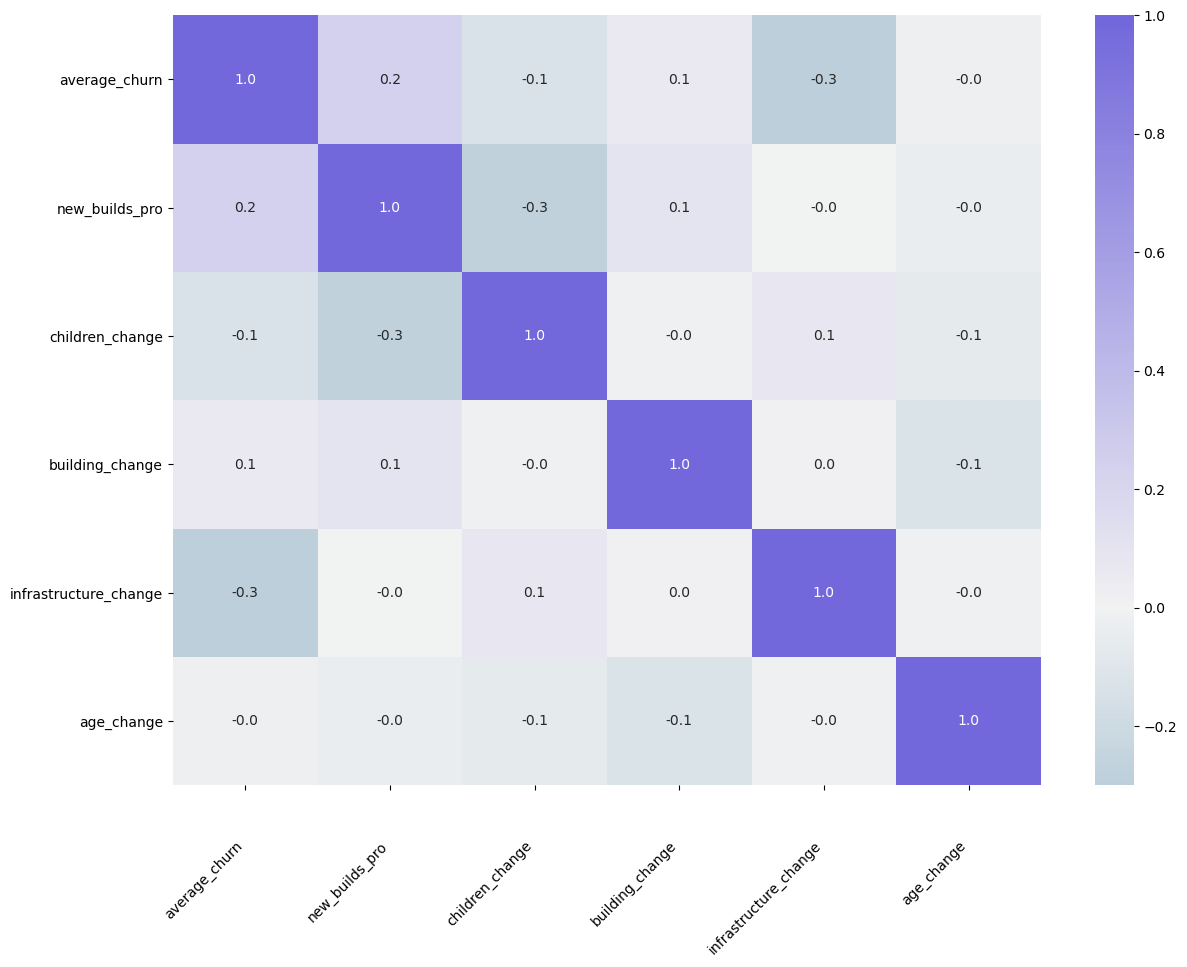

In [350]:
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(235.5, 268.1, as_cmap=True)

ax=sns.heatmap(cluster_1.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.savefig(os.path.join("Figures", 'heat_gent_nc_urban_dem_cluster_raw.png'), transparent=True, dpi=300)


In [351]:
cluster_1.columns

Index(['average_churn', 'new_builds_pro', 'children_change', 'building_change',
       'infrastructure_change', 'age_change'],
      dtype='object')

In [352]:
# fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(20,20))

# sns.set(style="whitegrid")
# sns.set(font_scale = 1)

# sns.histplot(ax=axs[0,0],data=cluster_1, x="new_builds_pro", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# #sns.histplot(ax=axs[0,1],data=cluster_1, x="hotel_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[1,0],data=cluster_1, x="children_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[1,1],data=cluster_1, x="age_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# #sns.histplot(ax=axs[2, 0],data=cluster_1, x="creative_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[2,1],data=cluster_1, x="infrastructure_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# #sns.histplot(ax=axs[3,0],data=cluster_1, x="creative_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# #sns.histplot(ax=axs[3,1],data=cluster_1, x="leisure_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# #sns.histplot(ax=axs[4,0],data=cluster_1, x="property_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# #sns.histplot(ax=axs[4,1],data=cluster_1, x="eateries_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[5,0],data=cluster_1, x="average_churn", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# plt.tight_layout()

# plt.legend() 

# plt.savefig(os.path.join("Figures", 'hist_gent_cluster_raw.png'), transparent=True, dpi=300)

# plt.show()

# 6.2 Transform

In [353]:
# applying cube root transformation to data variables

cluster_1_cubeRoot = np.cbrt(cluster_1)

In [354]:
# fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(20,20))

# sns.set(style="whitegrid")
# sns.set(font_scale = 1)

# sns.histplot(ax=axs[0,0],data=cluster_1_cubeRoot, x="new_builds_pro", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[0,1],data=cluster_1_cubeRoot, x="hotel_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[1,0],data=cluster_1_cubeRoot, x="children_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[1,1],data=cluster_1_cubeRoot, x="age_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[2, 0],data=cluster_1_cubeRoot, x="creative_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[2,1],data=cluster_1_cubeRoot, x="infrastructure_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[3,0],data=cluster_1_cubeRoot, x="creative_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[3,1],data=cluster_1_cubeRoot, x="leisure_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[4,0],data=cluster_1_cubeRoot, x="property_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[4,1],data=cluster_1_cubeRoot, x="eateries_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[5,0],data=cluster_1_cubeRoot, x="average_churn", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# plt.tight_layout()

# plt.legend() 

# plt.savefig(os.path.join("Figures", 'hist_gent_cluster_raw.png'), transparent=True, dpi=300)

# plt.show()

In [355]:
cluster_1

,average_churn,new_builds_pro,children_change,building_change,infrastructure_change,age_change
LSOA11CD,,,,,,
E01023985,0.0778,0.037037,0.000000,25.000000,0.000000,0.0
E01023986,0.1148,0.001664,33.333333,-33.333333,0.000000,0.0
E01023988,0.0842,0.033333,0.000000,33.333333,6.250000,0.0
E01023992,0.1362,0.001689,0.000000,-12.500000,24.137931,0.0
E01023996,0.0892,0.001988,-100.000000,0.000000,22.222222,0.0
...,...,...,...,...,...,...
E01024853,0.0690,0.018868,0.000000,-50.000000,0.000000,0.0
E01032735,0.0666,0.084459,0.000000,-50.000000,0.000000,0.0
E01032813,0.1146,0.013495,0.000000,-200.000000,0.000000,0.0


In [356]:
# applying the Yeo-Johnson transformation to data variables

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(cluster_1)

cluster_1_yeoJohnson = pt.transform(cluster_1)

In [357]:
cluster_1_yeoJohnson = pd.DataFrame(cluster_1_yeoJohnson, index = cluster_1.index, columns = cluster_1.columns)


In [358]:
cluster_1_yeoJohnson.head()


,average_churn,new_builds_pro,children_change,building_change,infrastructure_change,age_change
LSOA11CD,,,,,,
E01023985,-0.498199,1.353994,0.047851,0.782981,0.069545,-0.005609
E01023986,0.725370,-0.936987,1.938988,-0.144526,0.069545,-0.005609
E01023988,-0.236439,1.231568,0.047851,0.971743,0.574341,-0.005609
E01023992,1.185870,-0.933998,0.047851,0.101207,2.247145,-0.005609
E01023996,-0.048483,-0.898901,-2.533429,0.269862,2.059479,-0.005609


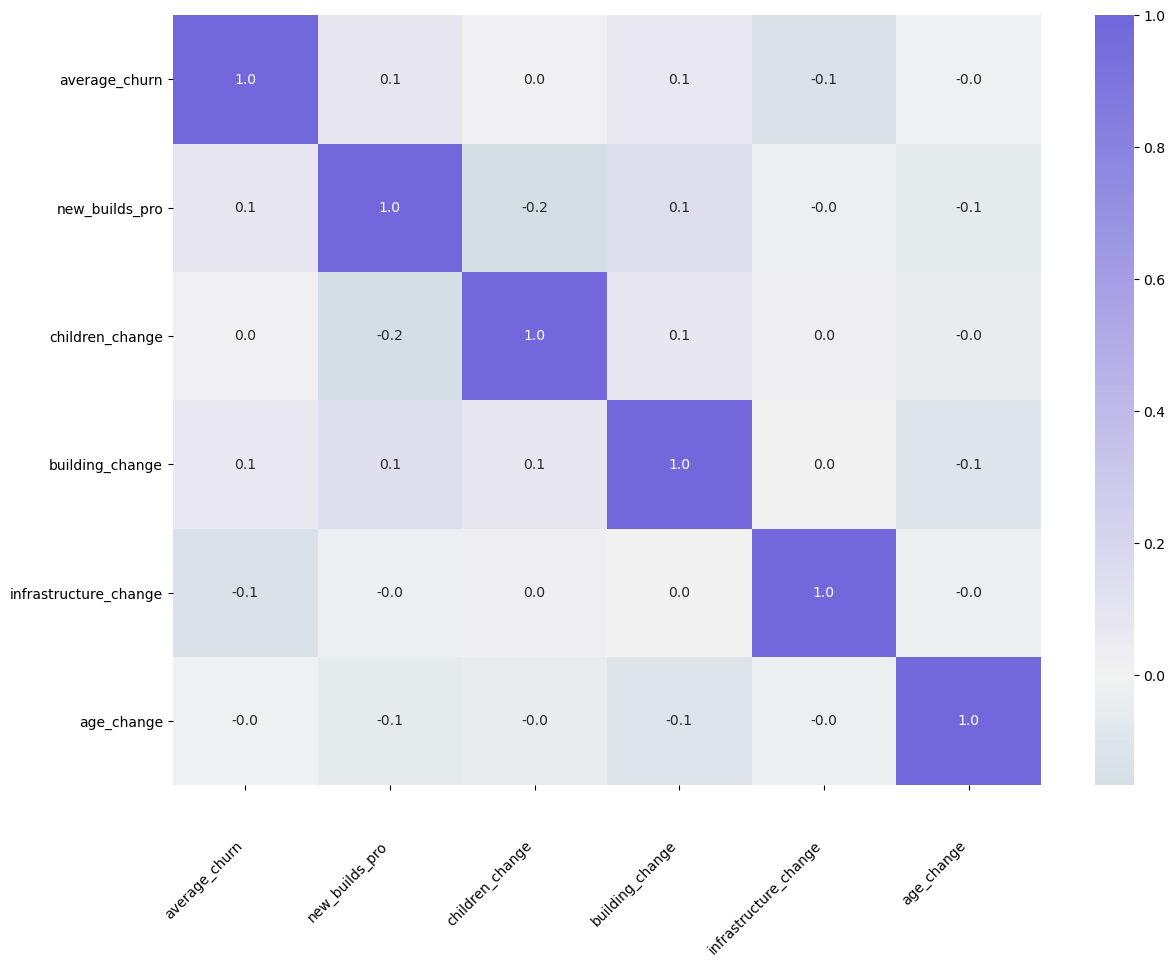

In [359]:
# check for multi-collinearity between variables
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(235.5, 268.1, as_cmap=True)
#cmap = sns.diverging_palette(204,252, as_cmap=True)

ax=sns.heatmap(cluster_1_yeoJohnson.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")
plt.xticks(rotation=45,ha='right',fontsize=10)

plt.savefig(os.path.join("Figures", 'heat_gent__nc_urban_dem_cluster_yeo.png'), transparent=True, dpi=300)

In [360]:
# applying the inverse hyperbolic sine transformation to data variables

cluster_1_invSine = np.arcsinh(cluster_1)

In [361]:
# fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(20,20))

# sns.set(style="whitegrid")
# sns.set(font_scale = 1)

# sns.histplot(ax=axs[0,0],data=cluster_1_invSine, x="new_builds_pro", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[0,1],data=cluster_1_invSine, x="hotel_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[1,0],data=cluster_1_invSine, x="children_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[1,1],data=cluster_1_invSine, x="age_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[2, 0],data=cluster_1_invSine, x="creative_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[2,1],data=cluster_1_invSine, x="infrastructure_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[3,0],data=cluster_1_invSine, x="creative_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[3,1],data=cluster_1_invSine, x="leisure_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[4,0],data=cluster_1_invSine, x="property_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
# sns.histplot(ax=axs[4,1],data=cluster_1_invSine, x="eateries_change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# sns.histplot(ax=axs[5,0],data=cluster_1_invSine, x="average_churn", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

# plt.tight_layout()

# plt.legend() 

# plt.savefig(os.path.join("Figures", 'hist_gent_cluster_raw.png'), transparent=True, dpi=300)

# plt.show()

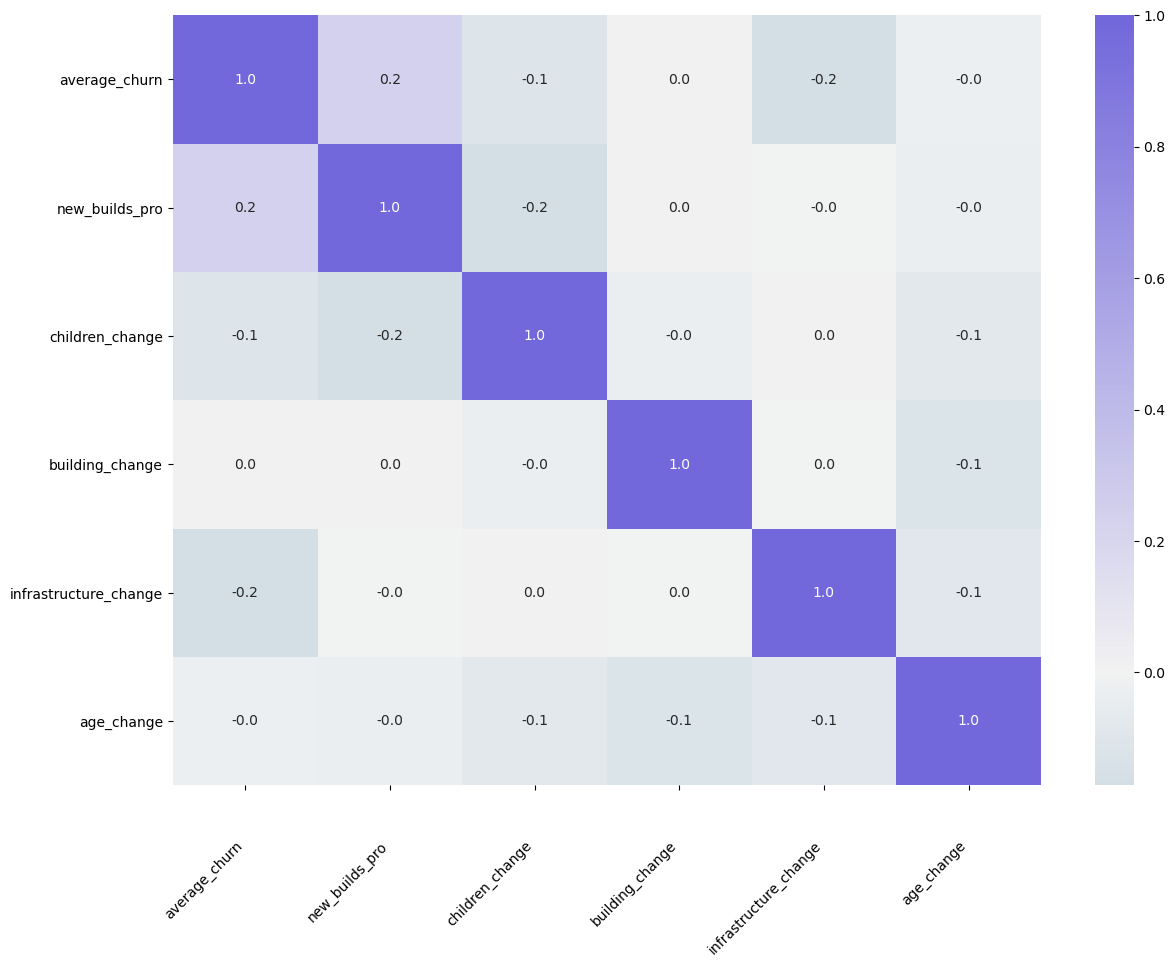

In [362]:
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(235.5, 268.1, as_cmap=True)
#cmap = sns.diverging_palette(204,252, as_cmap=True)

ax=sns.heatmap(cluster_1_invSine.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")
plt.xticks(rotation=45,ha='right',fontsize=10)

plt.savefig(os.path.join("Figures", 'heat_gent_cluster__nc_urban_dem_invsine.png'), transparent=True, dpi=300)

# 6.3 Scaling

In [363]:
# applying z-score standardisation on all 4 datasets

from scipy.stats import zscore


cluster_1_noTrans = cluster_1[:]
cluster_1_noTrans_zscore = cluster_1_noTrans.apply(zscore)
cluster_1_cubeRoot_zscore = cluster_1_cubeRoot.apply(zscore)
cluster_1_yeoJohnson_zscore = cluster_1_yeoJohnson.apply(zscore)
cluster_1_invSine_zscore = cluster_1_invSine.apply(zscore)

In [364]:
# applying RobustScaler (inter-quartile range standardisation) on all 4 datasets

from sklearn.preprocessing import RobustScaler

transformer1 = RobustScaler().fit(cluster_1_noTrans)
cluster_1_noTrans_robust = transformer1.transform(cluster_1_noTrans)
cluster_1_noTrans_robust = pd.DataFrame(cluster_1_noTrans_robust, index = cluster_1_noTrans.index, columns = cluster_1_noTrans.columns)


transformer2 = RobustScaler().fit(cluster_1_cubeRoot)
cluster_1_cubeRoot_robust = transformer2.transform(cluster_1_cubeRoot)
cluster_1_cubeRoot_robust = pd.DataFrame(cluster_1_cubeRoot_robust, index = cluster_1_cubeRoot.index, columns = cluster_1_cubeRoot.columns)


transformer3 = RobustScaler().fit(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_robust = transformer3.transform(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_robust = pd.DataFrame(cluster_1_yeoJohnson_robust, index = cluster_1_yeoJohnson.index, columns = cluster_1_yeoJohnson.columns)


transformer4 = RobustScaler().fit(cluster_1_invSine)
cluster_1_invSine_robust = transformer4.transform(cluster_1_invSine)
cluster_1_invSine_robust = pd.DataFrame(cluster_1_invSine_robust, index = cluster_1_invSine.index, columns = cluster_1_invSine.columns)

In [365]:
# applying RobustScaler (inter-decile range standardisation) on all 4 datasets

transformer5 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_noTrans)
cluster_1_noTrans_decile = transformer5.transform(cluster_1_noTrans)
cluster_1_noTrans_decile = pd.DataFrame(cluster_1_noTrans_decile, index = cluster_1_noTrans.index, columns = cluster_1_noTrans.columns)


transformer6 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_cubeRoot)
cluster_1_cubeRoot_decile = transformer6.transform(cluster_1_cubeRoot)
cluster_1_cubeRoot_decile = pd.DataFrame(cluster_1_cubeRoot_decile, index = cluster_1_cubeRoot.index, columns = cluster_1_cubeRoot.columns)


transformer7 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_decile = transformer7.transform(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_decile = pd.DataFrame(cluster_1_yeoJohnson_decile, index = cluster_1_yeoJohnson.index, columns = cluster_1_yeoJohnson.columns)


transformer8 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_invSine)
cluster_1_invSine_decile = transformer8.transform(cluster_1_invSine)
cluster_1_invSine_decile = pd.DataFrame(cluster_1_invSine_decile, index = cluster_1_invSine.index, columns = cluster_1_invSine.columns)

In [366]:
# check for heavily-skewed variables (i.e. skewness scores beyond +/- 1)

# df_full = [cluster_1_noTrans_zscore, cluster_1_cubeRoot_zscore, cluster_1_yeoJohnson_zscore, cluster_1_invSine_zscore, cluster_1_noTrans_robust, cluster_1_cubeRoot_robust, cluster_1_yeoJohnson_robust, cluster_1_invSine_robust, cluster_1_noTrans_decile, cluster_1_cubeRoot_decile, cluster_1_yeoJohnson_decile, cluster_1_invSine_decile]
# df_full_name = ["cluster_1_noTrans_zscore", "cluster_1_cubeRoot_zscore", "cluster_1_yeoJohnson_zscore", "cluster_1_invSine_zscore", "cluster_1_noTrans_robust", "cluster_1_cubeRoot_robust", "cluster_1_yeoJohnson_robust", "cluster_1_invSine_robust", "cluster_1_noTrans_decile", "cluster_1_cubeRoot_decile", "cluster_1_yeoJohnson_decile", "cluster_1_invSine_decile"]

# for method in range(len(df_full)):
#     counter = 0
#     for col in range(0,8):
#         if df_full[method][df_full[method].columns[col]].skew() > 1:
#             counter += 1
#         elif df_full[method][df_full[method].columns[col]].skew() <- 1:
#             counter += 1
#     print(str(df_full_name[method]) + " has " + str(counter) + " variables with skew >1 or <-1 \n")

For n_clusters = 2 The average silhouette_score is : 0.5894620104776063
For n_clusters = 3 The average silhouette_score is : 0.5743590127741753
For n_clusters = 4 The average silhouette_score is : 0.410652357813043
For n_clusters = 5 The average silhouette_score is : 0.48379776493473536
For n_clusters = 6 The average silhouette_score is : 0.44172283332177587
For n_clusters = 7 The average silhouette_score is : 0.39760908938807904
For n_clusters = 8 The average silhouette_score is : 0.4061133378460831
For n_clusters = 9 The average silhouette_score is : 0.41409053548520375
For n_clusters = 10 The average silhouette_score is : 0.39824164579282306


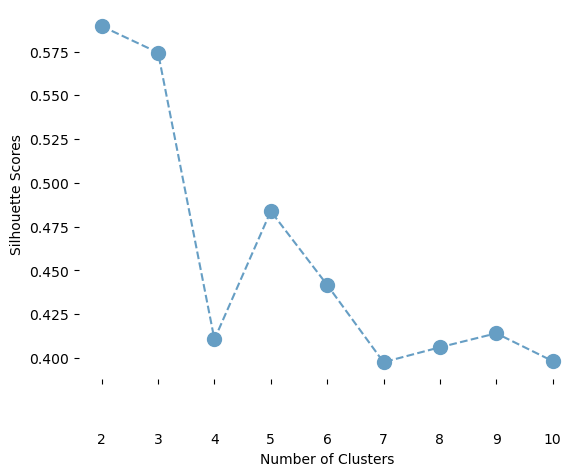

In [367]:
# check and plot silhouette scores to determine the optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
Sum_of_squared_distances = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_1)
    Sum_of_squared_distances.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(cluster_1, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

clusters = pd.DataFrame(silhouette_scores, index=None).reset_index().rename(columns={"index":"Cluster",0:"silhouette_score"})

plt.plot(range_n_clusters, silhouette_scores, 'o--', color="#669EC4", ms=10)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.savefig(os.path.join("Figures", 'line_cluster_nc_urban_dem__sil.png'), transparent=True, dpi=300)
plt.show()

# 6.4 Cluster

In [368]:
permutation = ["yeoJohnson-zscore", "yeoJohnson-robust(interquartile)","yeoJohnson-robust(interdecile)", "cubeRoot-zscore", "cubeRoot-robust(interquartile)","cubeRoot-robust(interdecile)","invSine-zscore", "invSine-robust(interquartile)", "invSine-robust(interdecile)"]
calinski_harabasz_scores = []

In [369]:
n_clusters = 3

In [370]:
# k-means clustering for yeo-johnson dataset permutations

cluster_1_yeoJohnson_zscore_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_yeoJohnson_zscore)
cluster_1_yeoJohnson_robust_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_yeoJohnson_robust)
cluster_1_yeoJohnson_decile_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_yeoJohnson_decile)

cluster_1_yeoJohnson_zscore_labels = cluster_1_yeoJohnson_zscore_kmeans.labels_
cluster_1_yeoJohnson_robust_labels = cluster_1_yeoJohnson_robust_kmeans.labels_
cluster_1_yeoJohnson_decile_labels = cluster_1_yeoJohnson_decile_kmeans.labels_

In [371]:
cluster_1_yJ_zscore_original = cluster_1[:]
cluster_1_yJ_zscore_original["cluster_1_yeoJohnson_zscore_labels"]=cluster_1_yeoJohnson_zscore_labels

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [372]:
cluster_1_yJ_robust_original = cluster_1[:]
cluster_1_yJ_robust_original["cluster_1_yeoJohnson_robust_labels"]=cluster_1_yeoJohnson_robust_labels

In [373]:
cluster_1_yJ_decile_original = cluster_1[:]
cluster_1_yJ_decile_original["cluster_1_yeoJohnson_decile_labels"]=cluster_1_yeoJohnson_decile_labels

In [374]:
# measuring the performance for yeo-johnson dataset permutations

from sklearn import metrics
from sklearn.metrics import pairwise_distances

print(metrics.calinski_harabasz_score(cluster_1_yJ_zscore_original, cluster_1_yeoJohnson_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_yJ_zscore_original, cluster_1_yeoJohnson_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_1_yJ_robust_original, cluster_1_yeoJohnson_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_yJ_robust_original, cluster_1_yeoJohnson_robust_labels))

print(metrics.calinski_harabasz_score(cluster_1_yJ_decile_original, cluster_1_yeoJohnson_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_yJ_decile_original, cluster_1_yeoJohnson_decile_labels))

18.780983207635238
2.0958744704048677
5.562557500741758


In [375]:
# k-means clustering for cube-root dataset permutations

cluster_1_cubeRoot_zscore_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_cubeRoot_zscore)
cluster_1_cubeRoot_robust_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_cubeRoot_robust)
cluster_1_cubeRoot_decile_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_cubeRoot_decile)

cluster_1_cubeRoot_zscore_labels = cluster_1_cubeRoot_zscore_kmeans.labels_
cluster_1_cubeRoot_robust_labels = cluster_1_cubeRoot_robust_kmeans.labels_
cluster_1_cubeRoot_decile_labels = cluster_1_cubeRoot_decile_kmeans.labels_

In [376]:
cluster_1_cB_zscore_original = cluster_1[:]
cluster_1_cB_zscore_original["cluster_1_cubeRoot_zscore_labels"]=cluster_1_cubeRoot_zscore_labels

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [377]:
cluster_1_cB_robust_original = cluster_1[:]
cluster_1_cB_robust_original["cluster_1_cubeRoot_robust_labels"]=cluster_1_cubeRoot_robust_labels

In [378]:
cluster_1_cB_decile_original = cluster_1[:]
cluster_1_cB_decile_original["cluster_1_cubeRoot_decile_labels"]=cluster_1_cubeRoot_decile_labels


In [379]:
# measuring the performance for cube-root dataset permutations

print(metrics.calinski_harabasz_score(cluster_1_cB_zscore_original, cluster_1_cubeRoot_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_cB_zscore_original, cluster_1_cubeRoot_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_1_cB_robust_original, cluster_1_cubeRoot_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_cB_robust_original, cluster_1_cubeRoot_robust_labels))

print(metrics.calinski_harabasz_score(cluster_1_cB_decile_original, cluster_1_cubeRoot_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_cB_decile_original, cluster_1_cubeRoot_decile_labels))

24.21862303724005
6.607342070616406
6.608617363899814


In [380]:
# k-means clustering for inverse sine dataset permutations

cluster_1_invSine_zscore_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_invSine_zscore)
cluster_1_invSine_robust_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_invSine_robust)
cluster_1_invSine_decile_kmeans = KMeans(n_clusters=n_clusters, init = "k-means++", random_state=0, n_init=5000, max_iter=50000).fit(cluster_1_invSine_decile)

cluster_1_invSine_zscore_labels = cluster_1_invSine_zscore_kmeans.labels_
cluster_1_invSine_robust_labels = cluster_1_invSine_robust_kmeans.labels_
cluster_1_invSine_decile_labels = cluster_1_invSine_decile_kmeans.labels_

In [381]:
cluster_1_iS_zscore_original = cluster_1[:]
cluster_1_iS_zscore_original["cluster_1_invSine_zscore_labels"]=cluster_1_invSine_zscore_labels

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [382]:
cluster_1_iS_robust_original = cluster_1[:]
cluster_1_iS_robust_original["cluster_1_invSine_robust_labels"]=cluster_1_invSine_robust_labels

In [383]:
cluster_1_iS_decile_original = cluster_1[:]
cluster_1_iS_decile_original["cluster_1_invSine_decile_labels"]=cluster_1_invSine_decile_labels

In [384]:
# measuring the performance for inverse sine dataset permutations

print(metrics.calinski_harabasz_score(cluster_1_iS_zscore_original, cluster_1_invSine_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_iS_zscore_original, cluster_1_invSine_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_1_iS_robust_original, cluster_1_invSine_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_iS_robust_original, cluster_1_invSine_robust_labels))

print(metrics.calinski_harabasz_score(cluster_1_iS_decile_original, cluster_1_invSine_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_iS_decile_original, cluster_1_invSine_decile_labels))

30.09365792193054
4.250416571955536
6.608617363899814


In [385]:
permutation

['yeoJohnson-zscore',
 'yeoJohnson-robust(interquartile)',
 'yeoJohnson-robust(interdecile)',
 'cubeRoot-zscore',
 'cubeRoot-robust(interquartile)',
 'cubeRoot-robust(interdecile)',
 'invSine-zscore',
 'invSine-robust(interquartile)',
 'invSine-robust(interdecile)']

/tmp/ipykernel_441/3733293152.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(permutation, fontsize=14)
/tmp/ipykernel_441/3733293152.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(0,140,20), fontsize=14)


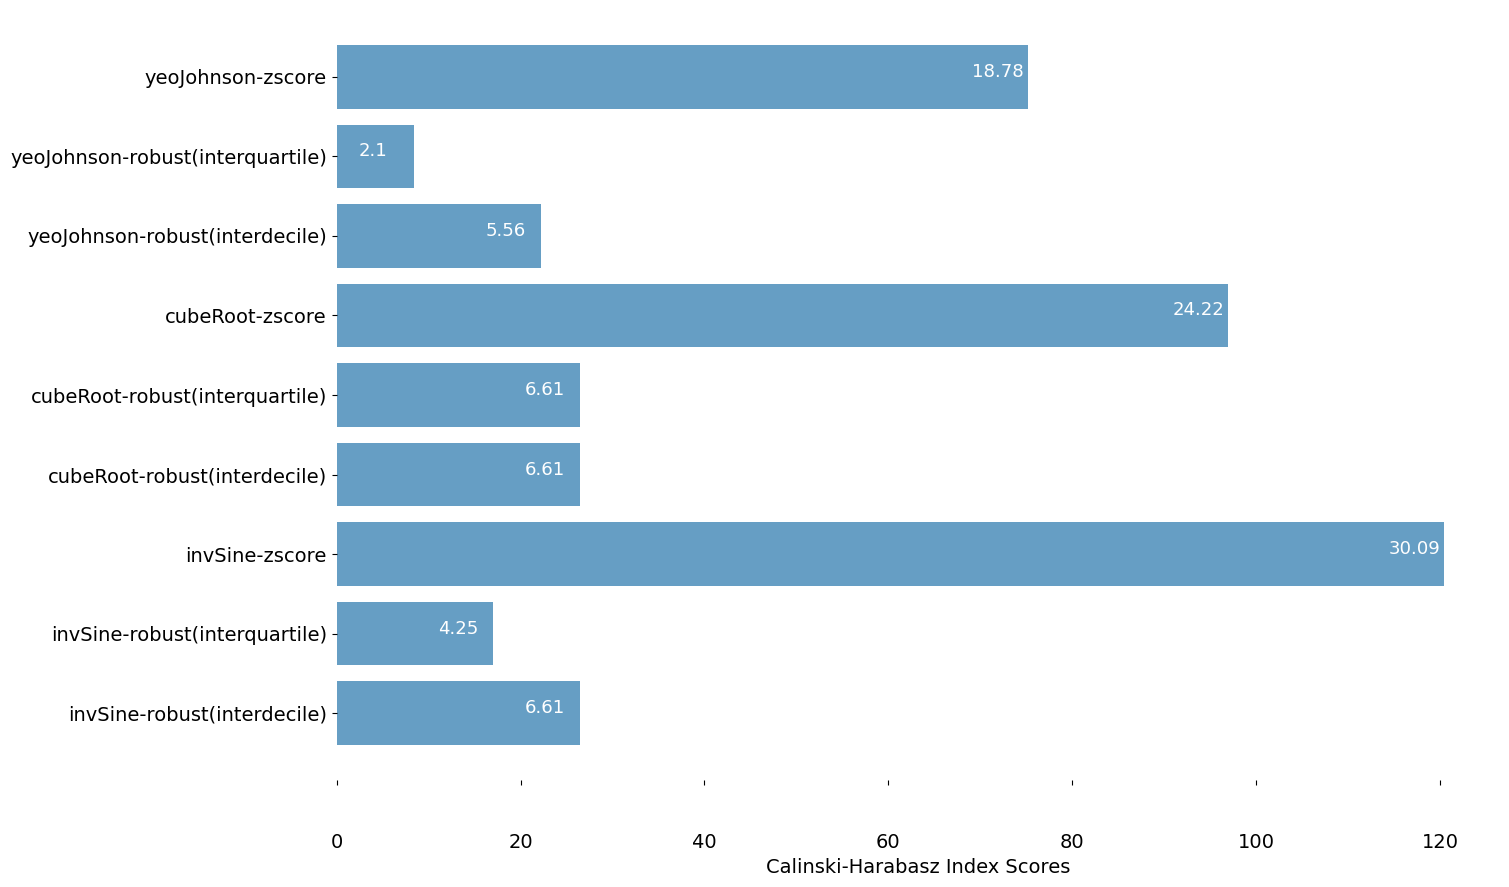

In [386]:
plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(15, 10))

bar = plt.barh(permutation, calinski_harabasz_scores, color = ["#669EC4"])

for i in range(len(permutation)):
    plt.text(x = calinski_harabasz_scores[i]-1.5, y = i, s = calinski_harabasz_scores[i].round(2), size = 13, color="white")
    
ax.set_yticklabels(permutation, fontsize=14)
ax.set_xticklabels(range(0,140,20), fontsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Calinski-Harabasz Index Scores',fontsize=14)

plt.savefig(os.path.join("Figures", 'bar_gent_cluster__nc_urban_dem_perf.png'), transparent=True, dpi=300)

plt.show()

In [387]:
# extracting cluster details of the best-performing dataset

#cluster_1_invSine_zscore_labels.groupby("cluster_1_invSine_zscore_labels").size()

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

In [388]:
# appending cluster labels to main dataset

cluster_1_iS_zscore_original["cluster_1_invSine_zscore_labels"]=cluster_1_invSine_zscore_labels

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


# 7. Plot

In [389]:
# creating a new dataset for plotting purposes
#cluster_1_yJ_zscore_original = cluster_1_yJ_zscore_original.drop(["average_churn"], axis=1)
radar_1 = cluster_1_iS_zscore_original.groupby("cluster_1_invSine_zscore_labels").mean().reset_index()

In [390]:
# appending dataset average values to main dataset

radar_avg = cluster_1_iS_zscore_original.drop(columns = ["cluster_1_invSine_zscore_labels"]).mean().reset_index()

In [391]:
# rename columns for legibility

radar_avg = radar_avg.rename(columns={"index":"var", 0: "value"})


In [392]:
radar_1

,cluster_1_invSine_zscore_labels,average_churn,new_builds_pro,children_change,building_change,infrastructure_change,age_change
0,0,0.095743,0.013798,-3.511905,21.222364,-3.292452,-0.892857
1,1,0.085574,0.014064,-2.258065,-82.565924,-0.804428,2.956989
2,2,0.190745,0.062712,-27.272727,-36.151727,-13.030719,0.000000


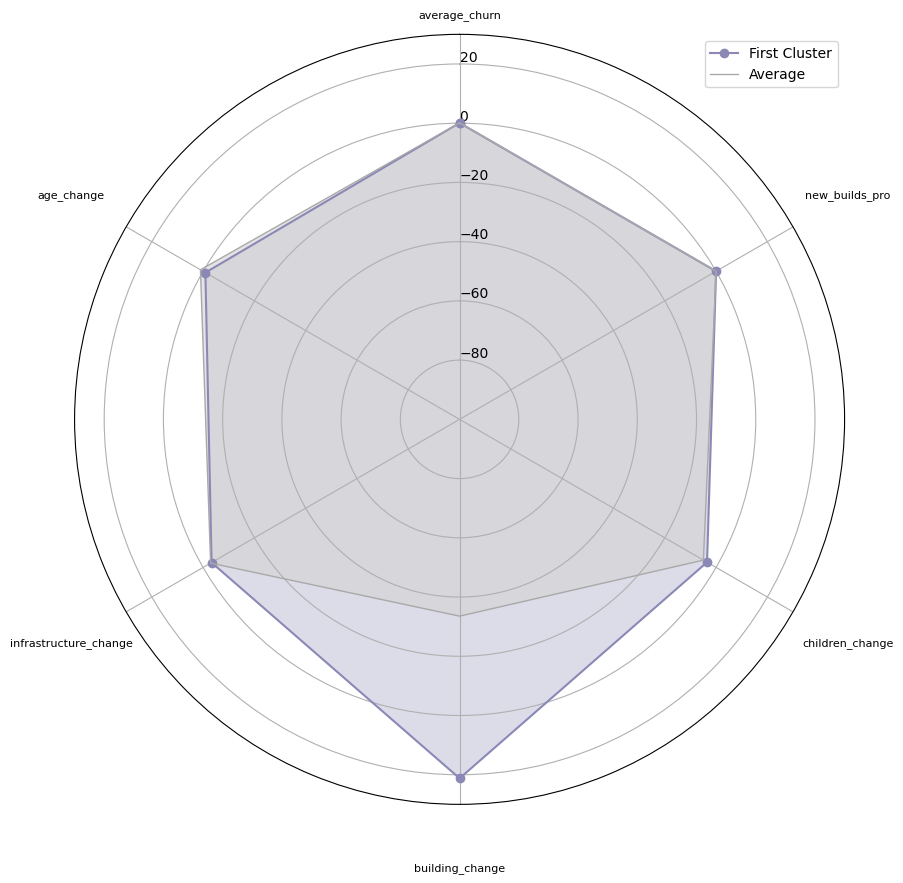

In [393]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster
plt.style.use('default')

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variables
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
ax.set_rlabel_position(0)
plt.rcParams['xtick.major.pad']='35'
plt.xticks(angles[:-1], categories, size = 8, rotation=90)
 
# Draw ylabels
plt.ylim(-100, 30)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, color = "#8B88B6", linestyle='solid', marker="o", label="First Cluster")
ax.fill(angles, values, '#8B88B6', alpha=0.3)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, color="darkgrey", linestyle='solid', label="Average")
ax.fill(angles, values, 'lightgrey', alpha=0.6)
 
plt.savefig(os.path.join("Figures", 'spider_gent_nc_urban_dem__cluster1.png'), transparent=True, dpi=300)

# Add legend
plt.legend(loc='upper right')

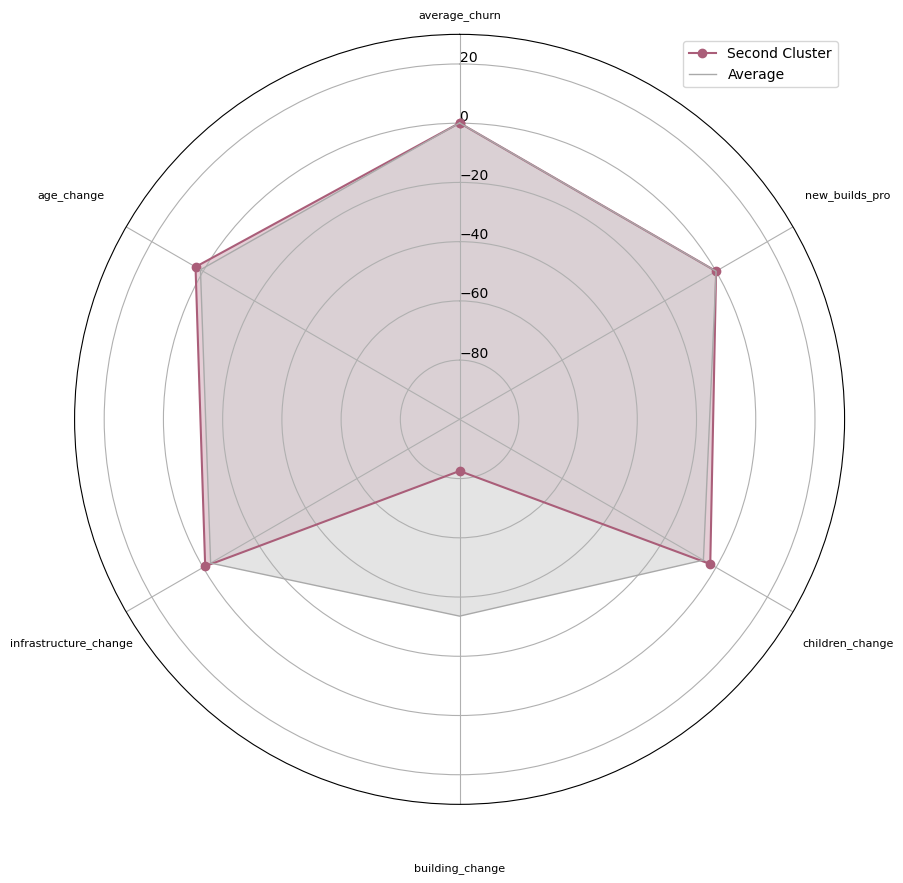

In [394]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster
plt.style.use('default')

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variables
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
ax.set_rlabel_position(0)
plt.rcParams['xtick.major.pad']='35'
plt.xticks(angles[:-1], categories, size = 8, rotation=90)
 
# Draw ylabels
plt.ylim(-100, 30)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[1,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, color = "#AA5E79", linestyle='solid', marker="o", label="Second Cluster")
ax.fill(angles, values, '#AA5E79', alpha=0.3)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, color="darkgrey", linestyle='solid', label="Average")
ax.fill(angles, values, 'lightgrey', alpha=0.6)
 
# Add legend

plt.savefig(os.path.join("Figures", 'spider_gent_nc_urban_dem__cluster2.png'), transparent=True, dpi=300)

plt.legend(loc='upper right')

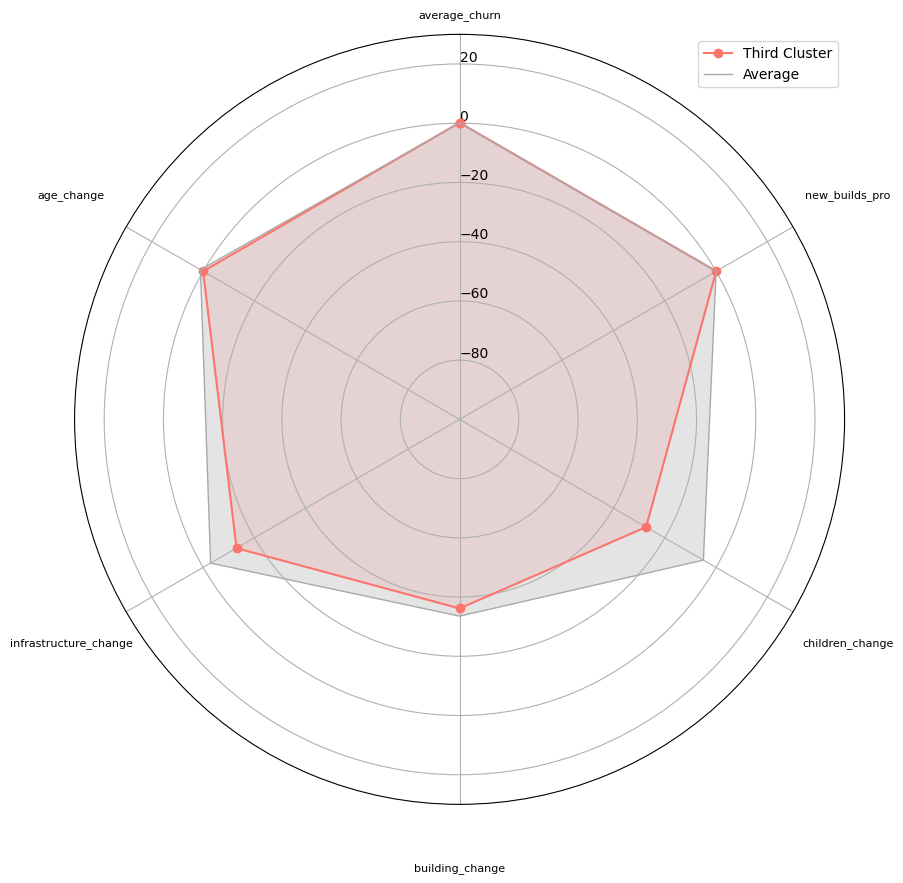

In [395]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster
plt.style.use('default')

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variables
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
ax.set_rlabel_position(0)
plt.rcParams['xtick.major.pad']='35'
plt.xticks(angles[:-1], categories, size = 8, rotation=90)
 
# Draw ylabels
plt.ylim(-100, 30)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[2,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, color = "#fd746c", linestyle='solid', marker="o", label="Third Cluster")
ax.fill(angles, values, '#fd746c', alpha=0.3)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, color="darkgrey", linestyle='solid', label="Average")
ax.fill(angles, values, 'lightgrey', alpha=0.6)

plt.savefig(os.path.join("Figures", 'spider_gent__nc_urban_dem_cluster3.png'), transparent=True, dpi=300)

 
# Add legend
plt.legend(loc='upper right')

In [396]:
# create new feature column in main dataset to host label categories

cluster_1_yJ_zscore_cat = cluster_1_iS_zscore_original[:].reset_index()
cluster_1_yJ_zscore_cat["cluster_1_yJ_zscore_cat"] = ""

In [397]:
cluster_1_yJ_zscore_cat

,LSOA11CD,average_churn,new_builds_pro,children_change,building_change,infrastructure_change,age_change,cluster_1_invSine_zscore_labels,cluster_1_yJ_zscore_cat
0,E01023985,0.0778,0.037037,0.000000,25.000000,0.000000,0.0,0,
1,E01023986,0.1148,0.001664,33.333333,-33.333333,0.000000,0.0,1,
2,E01023988,0.0842,0.033333,0.000000,33.333333,6.250000,0.0,0,
3,E01023992,0.1362,0.001689,0.000000,-12.500000,24.137931,0.0,1,
4,E01023996,0.0892,0.001988,-100.000000,0.000000,22.222222,0.0,0,
...,...,...,...,...,...,...,...,...,...
124,E01024853,0.0690,0.018868,0.000000,-50.000000,0.000000,0.0,1,
125,E01032735,0.0666,0.084459,0.000000,-50.000000,0.000000,0.0,1,
126,E01032813,0.1146,0.013495,0.000000,-200.000000,0.000000,0.0,1,
127,E01032820,0.2092,0.155440,-200.000000,-33.333333,-35.714286,0.0,2,


In [398]:
# parse cluster labels to derive their categories 

cluster_1_yJ_zscore_cat["cluster_1_yJ_zscore_cat"] = "cluster3"

for i in range(len(cluster_1_yJ_zscore_cat)):
    if cluster_1_yJ_zscore_cat.loc[i, "cluster_1_invSine_zscore_labels"]==0:
        cluster_1_yJ_zscore_cat.loc[i, "cluster_1_yJ_zscore_cat"]="cluster1"
    if cluster_1_yJ_zscore_cat.loc[i, "cluster_1_invSine_zscore_labels"]==1:
        cluster_1_yJ_zscore_cat.loc[i, "cluster_1_yJ_zscore_cat"]="cluster2"


In [399]:
cluster_1_yJ_zscore_cat["cluster_1_invSine_zscore_labels"]. value_counts() 

1    62
0    56
2    11
Name: cluster_1_invSine_zscore_labels, dtype: int64

In [400]:
lsoa_2011 = gpd.read_file(os.path.join(shapefiles, "LSOA_KENT_2011.shp"))
outline = gpd.read_file(os.path.join(shapefiles, "KENT_OUTLINE.shp"))

In [401]:
Level1Cat = pd.merge(lsoa_2011, Level1Cat, left_on="LSOA11CD", right_on="LSOA11CD_nc")

In [402]:
cluster_1_yJ_zscore_cat = pd.merge(lsoa_2011, cluster_1_yJ_zscore_cat, on="LSOA11CD", how="right")

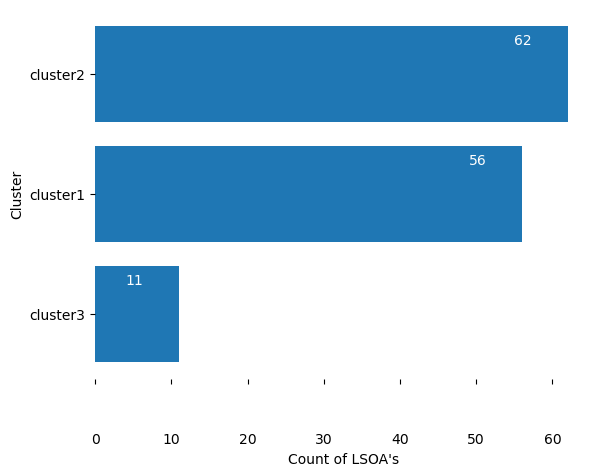

In [403]:
# Plot bar graph of counts

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

# check dataframe

count = pd.DataFrame(cluster_1_yJ_zscore_cat.groupby(cluster_1_yJ_zscore_cat["cluster_1_yJ_zscore_cat"]).size()).reset_index()
count = count.rename(columns={0:"count"}).sort_values(by="count")
count

fig, ax = plt.subplots()

index = ["Cluster 1", "Cluster 2", "Cluster 3"]
bar = plt.barh(count['cluster_1_yJ_zscore_cat'], count['count'])#, color = [ "#8B88B6", "#AA5E79", "#fd746c" ])

for i, v in enumerate(count["count"]):
    ax.text(v-7, i + .25, str(v), color='white', size=10)
    
plt.xlabel("Count of LSOA's")
plt.ylabel('Cluster')

plt.savefig(os.path.join("Figures", 'bar_gent_cats__nc_urban_dem_count.png'), transparent=True, dpi=300)

plt.show()

In [404]:
dec

,LSOA11CD,LSOA11NM,geometry,Unnamed: 0,LSOA11CD_nc,LSOA11NM_nc,Score_2014_nc,Score_2018_nc,Rank_2014_nc,Rank_2018_nc,Rank_chg_nc,Z_score_nc,score_chg_nc,Level1Cat_nc,geometry_nc
6,E01023978,Ashford 011A,"POLYGON ((583647.256 135671.644, 583640.003 13...",6,E01023978,Ashford 011A,2.776210,2.199570,12.0,53.0,-41.0,-0.356226,-0.576640,DEC,"POLYGON ((583647.2560000001 135671.644, 583640..."
7,E01023979,Ashford 011B,"POLYGON ((584242.049 138798.674, 584280.602 13...",7,E01023979,Ashford 011B,-0.347668,-0.094619,402.0,557.0,-155.0,-1.346709,0.253049,DEC,"POLYGON ((584242.049 138798.674, 584280.602 13..."
8,E01023980,Ashford 004A,"POLYGON ((601211.381 144939.921, 601209.404 14...",8,E01023980,Ashford 004A,-0.594257,-0.302360,506.0,627.0,-121.0,-1.051302,0.291896,DEC,"POLYGON ((601211.3810000001 144939.921, 601209..."
17,E01023990,Ashford 002D,"POLYGON ((596411.119 147469.696, 596429.125 14...",17,E01023990,Ashford 002D,-0.100137,-0.698095,305.0,772.0,-467.0,-4.057505,-0.597958,DEC,"POLYGON ((596411.1189999999 147469.696, 596429..."
19,E01023993,Ashford 004F,"POLYGON ((599082.985 142924.711, 599081.563 14...",19,E01023993,Ashford 004F,-0.771960,-0.602254,590.0,730.0,-140.0,-1.216383,0.169707,DEC,"POLYGON ((599082.985 142924.711, 599081.563 14..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,E01033089,Maidstone 008G,"POLYGON ((573155.862 155305.942, 573173.070 15...",891,E01033089,Maidstone 008G,-0.633500,-0.454152,528.0,686.0,-158.0,-1.372775,0.179348,DEC,"POLYGON ((573155.862 155305.942, 573173.069999..."
893,E01033091,Maidstone 006G,"POLYGON ((575136.000 155136.000, 575137.000 15...",893,E01033091,Maidstone 006G,-0.240741,-0.101824,358.0,561.0,-203.0,-1.763755,0.138916,DEC,"POLYGON ((575136 155136, 575137 155132, 575135..."
894,E01033092,Maidstone 004G,"POLYGON ((576739.816 155914.837, 576739.938 15...",894,E01033092,Maidstone 004G,-0.284046,-0.202813,373.0,600.0,-227.0,-1.972278,0.081234,DEC,"POLYGON ((576739.816 155914.837, 576739.938 15..."
899,E01033213,Shepway 002E,"POLYGON ((620229.159 139097.666, 620229.125 13...",899,E01033213,Shepway 002E,-0.698191,-0.786549,559.0,799.0,-240.0,-2.085228,-0.088358,DEC,"POLYGON ((620229.159 139097.666, 620229.125 13..."


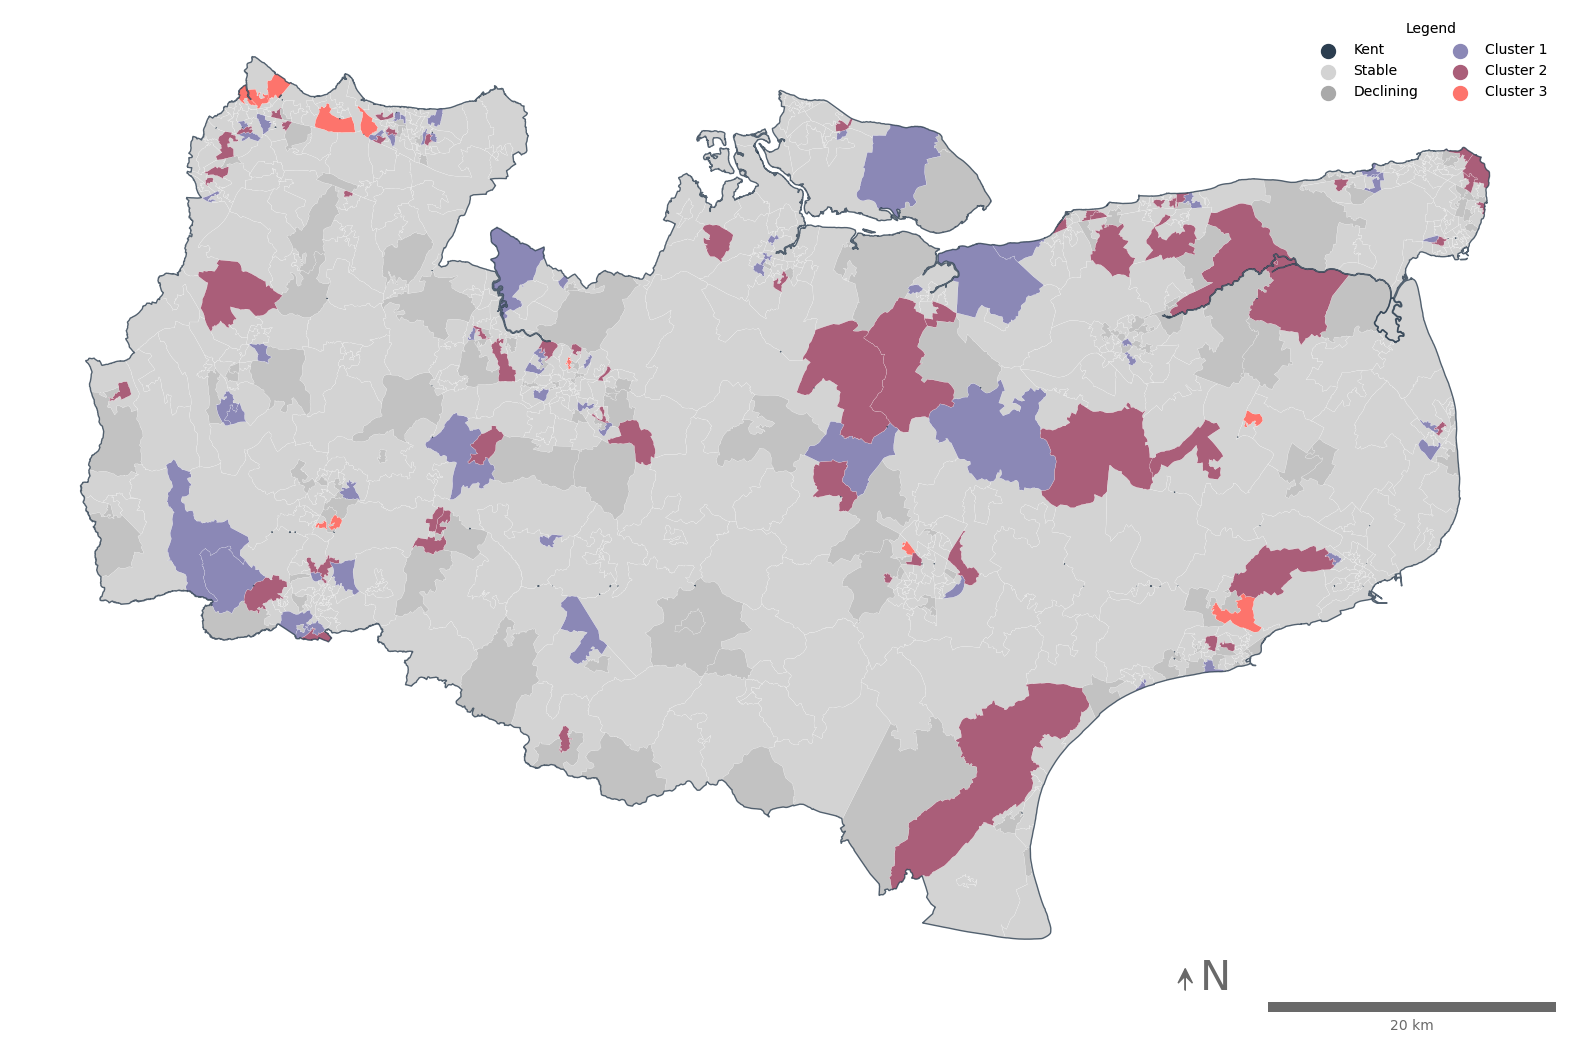

In [405]:
# Filter by status, allowing control over colors of map
stb = Level1Cat.loc[Level1Cat['Level1Cat_nc'] == "STB"]
dec = Level1Cat.loc[Level1Cat['Level1Cat_nc'] == "DEC"]
clus1 = cluster_1_yJ_zscore_cat.loc[cluster_1_yJ_zscore_cat['cluster_1_yJ_zscore_cat'] == "cluster1"]
clus2 = cluster_1_yJ_zscore_cat.loc[cluster_1_yJ_zscore_cat['cluster_1_yJ_zscore_cat'] == "cluster2"]
clus3 = cluster_1_yJ_zscore_cat.loc[cluster_1_yJ_zscore_cat['cluster_1_yJ_zscore_cat'] == "cluster3"]

# Set axes
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
lsoa_2011.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Plot outline of Kent
outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2011.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

stb.plot(ax=ax, facecolor="lightgrey")
dec.plot(ax=ax, facecolor="darkgrey", alpha=0.7)

clus1.plot(ax=ax, facecolor="#8B88B6")
clus2.plot(ax=ax, facecolor="#AA5E79")
clus3.plot(ax=ax, facecolor="#fd746c")

# Add legend
l1 = plt.scatter([],[], s=100, marker='o', color='#2c3e50')
l2 = plt.scatter([],[], s=100, marker='o', color='lightgrey')
l3 = plt.scatter([],[], s=100, marker='o', color='darkgrey')
l4 = plt.scatter([],[], s=100, marker='o', color='#8B88B6')
l5 = plt.scatter([],[], s=100, marker='o', color='#AA5E79')
l6 = plt.scatter([],[], s=100, marker='o', color='#fd746c')

labels = ["Kent", "Stable","Declining", "Cluster 1", "Cluster 2", "Cluster 3"]
legend = ax.legend([l1, l2,l3, l4, l5, l6], labels, loc="upper right", title='Legend', facecolor="white", edgecolor="white", ncol=2)    
ax.add_artist(legend)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_gent_nc_urban_dem_cluster.png'), transparent=True, dpi=300)

# Show map
plt.show()
